In [1]:
import pandas as pd
import numpy as np

1. [묶기] 같은 제품 같은 날짜 -> 매출

0 추가

2. post 추가

3. Relative time model, week

4. FE (date, product)

5. 그래프 그리기

 control 변수 (고객)

In [2]:
new_df = pd.read_csv("C:/Users/amore/Desktop/vegan/data/began_group_post.csv")

In [3]:
new_df

,PRD_CD,INCS_NO,STND_YMD,NET_PRD_SAL_AMT,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm,post
0,111650344,df161320881063fa0a29f3624cad69cc45d6746da0e5fa...,2018-12-06,32000.0,32000,2021-04-12,2023-04-11,0
1,111650344,df161320881063fa0a29f3624cad69cc45d6746da0e5fa...,2018-12-06,32000.0,32000,2021-04-12,2023-04-11,0
2,111650344,77cbb1df31b4da9fb17a180aea1d23136db4fe31f10870...,2018-12-06,19000.0,32000,2021-04-12,2023-04-11,0
3,111650344,14cb36a801887d044ae656d130332ca0738e7221437fff...,2018-12-06,21956.0,32000,2021-04-12,2023-04-11,0
4,111650344,73fcfb6e42003be3851d890348dfbbec6394798b9c8d2c...,2018-12-06,26006.0,32000,2021-04-12,2023-04-11,0
...,...,...,...,...,...,...,...,...
1374728,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27,1
1374729,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27,1
1374730,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27,1
1374731,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27,1


1. 같은 날짜, 같은 제품

In [4]:
aggregated_df = new_df.groupby(['STND_YMD', 'PRD_CD'], as_index=False).agg({
    'NET_PRD_SAL_AMT': 'sum',  # 합산
    'SAL_UTPR': 'first',      
    'vgn_bgn_dttm': 'first',   
    'vgn_end_dttm': 'first'
})

# 결과 확인
aggregated_df

,STND_YMD,PRD_CD,NET_PRD_SAL_AMT,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm
0,2018-12-06,110640576,36852.0,27000,2021-09-07,2022-09-06
1,2018-12-06,110651228,73514.0,15000,2021-05-06,2023-05-05
2,2018-12-06,111270188,44313.0,19900,2021-07-14,2022-07-13
3,2018-12-06,111270189,35820.0,19900,2021-08-13,2022-08-12
4,2018-12-06,111270225,66711.0,29900,2021-08-13,2022-08-12
...,...,...,...,...,...,...
59328,2024-04-23,111414097,98370.0,13500,2021-07-02,2023-07-01
59329,2024-04-23,111414099,38842.0,13500,2021-07-02,2023-07-01
59330,2024-04-23,111650778,181196.0,28000,2021-05-25,2023-05-24
59331,2024-04-23,111650892,23470.0,38000,2021-08-26,2022-08-25


In [5]:
# 조건에 맞는 데이터 필터링
filtered_df = new_df[(new_df['STND_YMD'] == '2018-12-06') & (new_df['PRD_CD'] == 110640576)]

# NET_PRD_SAL_AMT 합 계산
total_amt = filtered_df['NET_PRD_SAL_AMT'].sum()

# 결과 출력
total_amt

36852.0

In [ ]:
# 조건에 맞는 데이터 필터링 및 원하는 열 추출
#result_df = new_df[new_df['PRD_CD'] == 110640576][['SAL_UTPR', 'vgn_bgn_dttm', 'vgn_end_dttm']]

# 결과 확인
#result_df.head(50)

,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm
8487,27000,2021-09-07,2022-09-06
8488,27000,2021-09-07,2022-09-06
8489,27000,2021-09-07,2022-09-06
8490,27000,2021-09-07,2022-09-06
8491,27000,2021-09-07,2022-09-06
8492,27000,2021-09-07,2022-09-06
8493,27000,2021-09-07,2022-09-06
8494,27000,2021-09-07,2022-09-06
8495,27000,2021-09-07,2022-09-06
8496,27000,2021-09-07,2022-09-06


2. post 추가

In [7]:
# 날짜 datetime 형식으로 변환
aggregated_df['STND_YMD'] = pd.to_datetime(aggregated_df['STND_YMD'], errors='coerce')
aggregated_df['vgn_bgn_dttm'] = pd.to_datetime(aggregated_df['vgn_bgn_dttm'], errors='coerce')
aggregated_df['vgn_end_dttm'] = pd.to_datetime(aggregated_df['vgn_end_dttm'], errors='coerce')

In [8]:
# post 추가: 사이에 있는지 확인 // 유효기간 안에 있으면 1
aggregated_df['post'] = np.where(
    (aggregated_df['STND_YMD'] >= aggregated_df['vgn_bgn_dttm']) & (aggregated_df['STND_YMD'] <= aggregated_df['vgn_end_dttm']),
            1,
            0
)
aggregated_df

,STND_YMD,PRD_CD,NET_PRD_SAL_AMT,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm,post
0,2018-12-06,110640576,36852.0,27000,2021-09-07,2022-09-06,0
1,2018-12-06,110651228,73514.0,15000,2021-05-06,2023-05-05,0
2,2018-12-06,111270188,44313.0,19900,2021-07-14,2022-07-13,0
3,2018-12-06,111270189,35820.0,19900,2021-08-13,2022-08-12,0
4,2018-12-06,111270225,66711.0,29900,2021-08-13,2022-08-12,0
...,...,...,...,...,...,...,...
59328,2024-04-23,111414097,98370.0,13500,2021-07-02,2023-07-01,0
59329,2024-04-23,111414099,38842.0,13500,2021-07-02,2023-07-01,0
59330,2024-04-23,111650778,181196.0,28000,2021-05-25,2023-05-24,0
59331,2024-04-23,111650892,23470.0,38000,2021-08-26,2022-08-25,0


In [9]:
# 그룹화하여 PRD_CD별 post 값 리스트 생성
post_counts = aggregated_df.groupby('PRD_CD')['post'].apply(list)

# post 값이 0과 1을 모두 가지는 PRD_CD 필터링
valid_prd_cd = post_counts[post_counts.apply(lambda x: 0 in x and 1 in x)].index

# 조건에 맞는 PRD_CD의 행만 추출
filtered_rows = aggregated_df[aggregated_df['PRD_CD'].isin(valid_prd_cd)]

# 결과 확인
filtered_rows

,STND_YMD,PRD_CD,NET_PRD_SAL_AMT,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm,post
1,2018-12-06,110651228,73514.0,15000,2021-05-06,2023-05-05,0
22,2018-12-09,110651163,23325.0,15000,2021-06-23,2023-06-22,0
23,2018-12-09,110651228,44250.0,15000,2021-05-06,2023-05-05,0
31,2018-12-10,110651228,42240.0,15000,2021-05-06,2023-05-05,0
50,2018-12-12,110651163,15000.0,15000,2021-06-23,2023-06-22,0
...,...,...,...,...,...,...,...
59328,2024-04-23,111414097,98370.0,13500,2021-07-02,2023-07-01,0
59329,2024-04-23,111414099,38842.0,13500,2021-07-02,2023-07-01,0
59330,2024-04-23,111650778,181196.0,28000,2021-05-25,2023-05-24,0
59331,2024-04-23,111650892,23470.0,38000,2021-08-26,2022-08-25,0


3. Relative time model, week

In [10]:
import numpy as np
import pandas as pd

# DataFrame 슬라이스를 수정하기 전에 .loc 사용하기
filtered_rows.loc[:, 'STND_YMD'] = pd.to_datetime(filtered_rows['STND_YMD'], errors='coerce')
filtered_rows.loc[:, 'vgn_bgn_dttm'] = pd.to_datetime(filtered_rows['vgn_bgn_dttm'], errors='coerce')
filtered_rows.loc[:, 'vgn_end_dttm'] = pd.to_datetime(filtered_rows['vgn_end_dttm'], errors='coerce')

filtered_rows.loc[:, "NET_PRD_SAL_AMT"] = filtered_rows["NET_PRD_SAL_AMT"].apply(lambda x: np.log(x + 1))

filtered_rows.loc[:, "relative_time"] = filtered_rows["STND_YMD"] - filtered_rows["vgn_bgn_dttm"]
filtered_rows.loc[:, "relative_time"] = filtered_rows["relative_time"].dt.days

relat_df = filtered_rows[(filtered_rows["relative_time"] <= 30) & (filtered_rows["relative_time"] >= -30)].reset_index(drop=True)

relat_df

C:\Users\amore\AppData\Local\Temp\ipykernel_10512\4120708367.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rows.loc[:, "relative_time"] = filtered_rows["STND_YMD"] - filtered_rows["vgn_bgn_dttm"]


,STND_YMD,PRD_CD,NET_PRD_SAL_AMT,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm,post,relative_time
0,2021-04-05,111270662,10.271631,17000,2021-03-29,2023-03-28,1,7
1,2021-04-06,110651228,10.146473,15000,2021-05-06,2023-05-05,0,-30
2,2021-04-06,111270662,11.000448,17000,2021-03-29,2023-03-28,1,8
3,2021-04-07,110651228,9.615872,15000,2021-05-06,2023-05-05,0,-29
4,2021-04-07,111270662,9.741027,17000,2021-03-29,2023-03-28,1,9
...,...,...,...,...,...,...,...,...
1691,2022-08-12,111413945,9.687258,17900,2022-07-21,2023-07-20,1,22
1692,2022-08-14,111413945,9.687258,17900,2022-07-21,2023-07-20,1,24
1693,2022-08-16,111413945,10.355104,17900,2022-07-21,2023-07-20,1,26
1694,2022-08-18,110980005,10.348302,20000,2022-07-21,2023-07-20,1,28


In [11]:
# 확인용 코드
# relat_df[relat_df['PRD_CD'] == 111413945]

In [12]:
# 주 변수로 변환
def to_week(num):
    if num >= 0:
        temp = num//7
    else:
        temp = (num//7)
    return temp

relat_df["week"] = relat_df["relative_time"].apply(lambda x : to_week(x))
relat_df

,STND_YMD,PRD_CD,NET_PRD_SAL_AMT,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm,post,relative_time,week
0,2021-04-05,111270662,10.271631,17000,2021-03-29,2023-03-28,1,7,1
1,2021-04-06,110651228,10.146473,15000,2021-05-06,2023-05-05,0,-30,-5
2,2021-04-06,111270662,11.000448,17000,2021-03-29,2023-03-28,1,8,1
3,2021-04-07,110651228,9.615872,15000,2021-05-06,2023-05-05,0,-29,-5
4,2021-04-07,111270662,9.741027,17000,2021-03-29,2023-03-28,1,9,1
...,...,...,...,...,...,...,...,...,...
1691,2022-08-12,111413945,9.687258,17900,2022-07-21,2023-07-20,1,22,3
1692,2022-08-14,111413945,9.687258,17900,2022-07-21,2023-07-20,1,24,3
1693,2022-08-16,111413945,10.355104,17900,2022-07-21,2023-07-20,1,26,3
1694,2022-08-18,110980005,10.348302,20000,2022-07-21,2023-07-20,1,28,4


In [13]:
# week 값이 -5, -4, -3, -2, -1, 1, 2, 3, 4인 행 필터링
relat_df = relat_df[relat_df['week'].isin([-5, -4, -3, -2, -1, 1, 2, 3, 4])].reset_index(drop=True)
relat_df

,STND_YMD,PRD_CD,NET_PRD_SAL_AMT,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm,post,relative_time,week
0,2021-04-05,111270662,10.271631,17000,2021-03-29,2023-03-28,1,7,1
1,2021-04-06,110651228,10.146473,15000,2021-05-06,2023-05-05,0,-30,-5
2,2021-04-06,111270662,11.000448,17000,2021-03-29,2023-03-28,1,8,1
3,2021-04-07,110651228,9.615872,15000,2021-05-06,2023-05-05,0,-29,-5
4,2021-04-07,111270662,9.741027,17000,2021-03-29,2023-03-28,1,9,1
...,...,...,...,...,...,...,...,...,...
1519,2022-08-12,111413945,9.687258,17900,2022-07-21,2023-07-20,1,22,3
1520,2022-08-14,111413945,9.687258,17900,2022-07-21,2023-07-20,1,24,3
1521,2022-08-16,111413945,10.355104,17900,2022-07-21,2023-07-20,1,26,3
1522,2022-08-18,110980005,10.348302,20000,2022-07-21,2023-07-20,1,28,4


In [14]:
print(relat_df.columns)

Index(['STND_YMD', 'PRD_CD', 'NET_PRD_SAL_AMT', 'SAL_UTPR', 'vgn_bgn_dttm',
       'vgn_end_dttm', 'post', 'relative_time', 'week'],
      dtype='object')


In [15]:
# 비선형관계 보기 위해서 
rt = pd.get_dummies(relat_df["week"]).astype(int)
relat_df = pd.concat([relat_df, rt], axis=1)

4. FE (date, product)

In [16]:
# 상품코드별로 y_demeaned 구하기
def demean(df, column, group):
    return df[column] - df.groupby(group)[column].transform('mean')

relat_df["y_demeaned"] = demean(relat_df, "NET_PRD_SAL_AMT", "STND_YMD")
relat_df["y_demeaned"] = demean(relat_df, "y_demeaned", "PRD_CD")

5. 그래프 그리기

In [17]:
relat_df.columns[9:-1]

Index([-5, -4, -3, -2, -1, 1, 2, 3, 4], dtype='object')

In [18]:
import statsmodels.api as sm

clm = relat_df.columns[9:-1]

X = relat_df[clm]
y = relat_df["y_demeaned"]

X = sm.add_constant(X)

model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             y_demeaned   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.028
Date:                Tue, 25 Mar 2025   Prob (F-statistic):             0.0400
Time:                        13:36:36   Log-Likelihood:                -1515.1
No. Observations:                1524   AIC:                             3048.
Df Residuals:                    1515   BIC:                             3096.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0156      0.017      0.895      0.371      -0.019       0.050
-5             0.1327      0.093      1.423      0.155      -0.050       0.316
-4             0.0735      0.054      1.362      0.173      -0.032       0.179
-3            -0.0517      0.048     -1.083      0.279      -0.145       0.042
-2            -0.0713      0.047     -1.505      0.133      -0.164       0.022
-1            -0.0238      0.047     -0.505      0.614      -0.116       0.069
1             -0.1173      0.044     -2.657      0.008      -0.204      -0.031
2             -0.0399      0.042     -0.955      0.340      -0.122       0.042
3              0.0561      0.041      1.379      0.168      -0.024       0.136
4              0.0573      0.057      1.013      0.311      -0.054       0.168
==============================================================================
Omnibus:                       29.722   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.185
Skew:                          -0.127   Prob(JB):                     4.66e-12
Kurtosis:                       3.870   Cond. No.                     1.88e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.87e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
X

,const,-5,-4,-3,-2,-1,1,2,3,4
0,1.0,0,0,0,0,0,1,0,0,0
1,1.0,1,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,1,0,0,0
3,1.0,1,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1519,1.0,0,0,0,0,0,0,0,1,0
1520,1.0,0,0,0,0,0,0,0,1,0
1521,1.0,0,0,0,0,0,0,0,1,0
1522,1.0,0,0,0,0,0,0,0,0,1


In [20]:
y

0      -0.164409
1      -0.368855
2       0.262579
3      -0.004445
4      -0.101831
          ...   
1519    0.141988
1520    0.141988
1521    0.141988
1522    0.520816
1523    0.141988
Name: y_demeaned, Length: 1524, dtype: float64

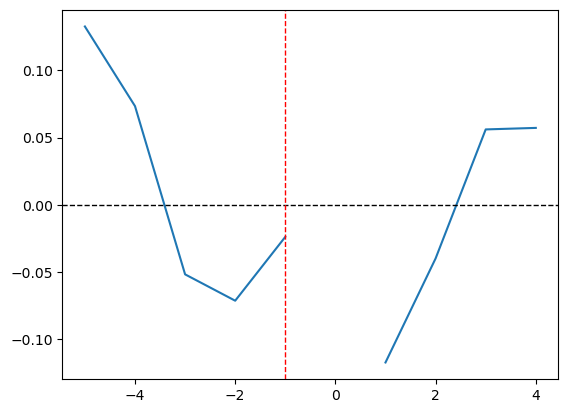

In [21]:
import matplotlib.pyplot as plt
dt = range(-5, 5)
res = list(result.params[1:])
res.insert(5, np.nan)
plt.plot(dt, res)
plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
plt.axvline(x=-1, color='r', linewidth=1, linestyle='--')

# 컨트롤 그룹과 트리트먼트 그룹의 차이